Q1

In [1]:
import pandas as pd
gold = pd.read_csv("gold.txt", delim_whitespace=True, names = ['url', 'category'])

In [2]:
labels = pd.read_csv("labels.txt", delim_whitespace=True, names = ['turk', 'url', 'category'])

Q2

In [3]:
labels_on_gold = labels[ labels['url'].isin(gold['url'].values) ]
labels_unknown = labels[ ~labels['url'].isin(gold['url'].values) ]

Q3

In [4]:
#data frame of number of rating per turk
count = pd.DataFrame(labels_on_gold.groupby('turk')['turk'].agg('count'))
count.columns = ['total']
count = count.reset_index()

In [5]:
#data frame to look at turk guess for gold versus actual
compare = pd.merge(labels_on_gold, gold, on = 'url', suffixes=('_guess', '_actual'))
compare['Correct'] = compare['category_guess'] == compare['category_actual']

In [6]:
allTurk = pd.DataFrame(compare.groupby(['turk', 'Correct'])['turk'].agg('count').unstack()).reset_index()

In [7]:
rater_goodness = pd.merge(allTurk, count, on = 'turk')
rater_goodness.columns = ['turk', 'incorrect', 'correct', 'total']
rater_goodness = rater_goodness.fillna(0)

In [8]:
rater_goodness['avg correct'] = rater_goodness['correct'] / rater_goodness['total']
rater_goodness

,turk,incorrect,correct,total,avg correct
0,A112DVP1KG4QZU,0.0,1.0,1,1.000000
1,A1253FXHCZ9CWM,14.0,15.0,29,0.517241
2,A12CY1Q7XKJJDE,0.0,1.0,1,1.000000
3,A12RE8G66WTO8B,5.0,15.0,20,0.750000
4,A12Y1GTGIQDGRA,2.0,1.0,3,0.333333
5,A13CEW9JGDWGX1,0.0,1.0,1,1.000000
6,A13OE9GBRJ0S2U,1.0,3.0,4,0.750000
7,A14IQ4GLNWNPOJ,0.0,1.0,1,1.000000
8,A153PKAL7OAY36,41.0,107.0,148,0.722973
9,A1554ZM0CLKSG5,0.0,1.0,1,1.000000


Question 4

In [9]:
rater_goodness['odds'] = rater_goodness['avg correct'] / (1.001 - rater_goodness['avg correct'])
rater_goodness

,turk,incorrect,correct,total,avg correct,odds
0,A112DVP1KG4QZU,0.0,1.0,1,1.000000,1000.000000
1,A1253FXHCZ9CWM,14.0,15.0,29,0.517241,1.069214
2,A12CY1Q7XKJJDE,0.0,1.0,1,1.000000,1000.000000
3,A12RE8G66WTO8B,5.0,15.0,20,0.750000,2.988048
4,A12Y1GTGIQDGRA,2.0,1.0,3,0.333333,0.499251
5,A13CEW9JGDWGX1,0.0,1.0,1,1.000000,1000.000000
6,A13OE9GBRJ0S2U,1.0,3.0,4,0.750000,2.988048
7,A14IQ4GLNWNPOJ,0.0,1.0,1,1.000000,1000.000000
8,A153PKAL7OAY36,41.0,107.0,148,0.722973,2.600369
9,A1554ZM0CLKSG5,0.0,1.0,1,1.000000,1000.000000


Question 5

In [10]:
rater_goodness[ rater_goodness['total'] >= 20 ].sort_values(by = 'avg correct', ascending = False).iloc[:10]

,turk,incorrect,correct,total,avg correct,odds
122,A2U0R4X38GUKZE,1.0,19.0,20,0.950000,18.627451
61,A22C0PJUBFJTI0,3.0,33.0,36,0.916667,10.869565
65,A23YQUBXZPKILZ,3.0,21.0,24,0.875000,6.944444
256,ATVALOQVDCMZW,15.0,88.0,103,0.854369,5.826657
26,A1HIXWH4OXT8S4,7.0,33.0,40,0.825000,4.687500
133,A3220HG1O83HQ4,4.0,18.0,22,0.818182,4.475385
136,A32W20KGQXS0LL,5.0,20.0,25,0.800000,3.980100
57,A20PWAB7G3HDHU,4.0,16.0,20,0.800000,3.980100
227,AJSJVK40F5HM6,6.0,22.0,28,0.785714,3.649635
132,A31OCN4MNHUQ6W,41.0,143.0,184,0.777174,3.472222


Question 6

Populating the interactive namespace from numpy and matplotlib


Text(0.5,0,'Log Total Ratings')

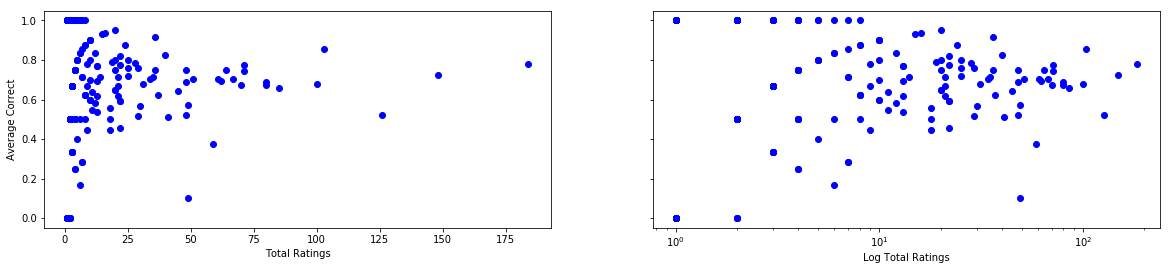

In [11]:
%pylab inline

fig, (ax1, ax2) = subplots(nrows=1,
                                ncols=2,
                                sharex=False,
                                sharey=True,
                                figsize=(20, 4))

ax1.plot(rater_goodness['total'], 
         rater_goodness['avg correct'], 
         marker='o', 
         color='blue', 
         linestyle='None')

ax2.plot(rater_goodness['total'], 
         rater_goodness['avg correct'], 
         marker='o', 
         color='blue', 
         linestyle='None')

ax2.set_xscale('log')

ax1.set_ylabel('Average Correct')
ax1.set_xlabel('Total Ratings')
ax2.set_xlabel('Log Total Ratings')

Question 7

In [12]:
reliable = rater_goodness.sort_values(by = 'total', ascending = False).iloc[:int(len(rater_goodness)*.25)]

In [13]:
appendOdds = pd.merge(labels_unknown, reliable[['turk', 'odds']], on = 'turk')

In [14]:
byURL = appendOdds.groupby(['url', 'turk','category'])[['odds']].agg('min').unstack('turk')

In [15]:
byURL['Odds Product'] = byURL.product(axis=1)

Question 8

In [16]:
result_75 = pd.DataFrame(byURL['Odds Product'].unstack('category'))
result_75['top odds'] = result_75.max(axis = 1)
result_75['top category'] = result_75.idxmax(axis = 1)
result_75.drop(['G', 'P', 'R', 'X'], axis=1)
result_75 = result_75[['top odds', 'top category']]
result_75

category,top odds,top category
url,,
http://0-101.net,2.155963,G
http://000.cc,1.393883,G
http://0000.jp,14.488244,G
http://000relationships.com,3.881884,G
http://000vitamins.com,3.784982,G
http://000webhost.com,11.159502,G
http://003my.com,4.912040,G
http://007absolutehardcore.com/early_cumshots/index.html,293.252871,X
http://007swz.cn,1.393883,G


Question 9

In [18]:
reliable25 = rater_goodness.sort_values(by = 'total', ascending = False).iloc[:int(len(rater_goodness)*.75)]
appendOdds25 = pd.merge(labels_unknown, reliable25[['turk', 'odds']], on = 'turk')
byURL25 = appendOdds25.groupby(['url', 'turk','category'])[['odds']].agg('min').unstack('turk')
byURL25['Odds Product'] = byURL25.product(axis=1)
result_25 = pd.DataFrame(byURL25['Odds Product'].unstack('category'))
result_25['top odds'] = result_25.max(axis = 1)
result_25['top category'] = result_25.idxmax(axis = 1)
result_25.drop(['G', 'P', 'R', 'X'], axis=1)
result_25 = result_25[['top odds', 'top category']]
result_25

category,top odds,top category
url,,
http://0-101.net,2.155963e+00,G
http://000.cc,2.081448e+03,G
http://0000.jp,2.877556e+07,G
http://000relationships.com,1.851852e+00,P
http://000vitamins.com,5.014149e+00,G
http://000webhost.com,1.113723e+07,G
http://003my.com,4.912040e+00,G
http://007absolutehardcore.com/early_cumshots/index.html,5.847515e+02,X
http://007swz.cn,1.391101e+00,G


In [28]:
compare = pd.merge(result_75['top category'], result_25['top category'], left_index = True, right_index=True, suffixes = [' 75', ' 25' ])
compare

,top category 75,top category 25
url,,
http://0-101.net,G,G
http://000.cc,G,G
http://0000.jp,G,G
http://000relationships.com,G,P
http://000vitamins.com,G,G
http://000webhost.com,G,G
http://003my.com,G,G
http://007absolutehardcore.com/early_cumshots/index.html,X,X
http://007swz.cn,G,G


In [30]:
pd.crosstab(compare['top category 75'], compare['top category 25'])

top category 25,G,P,R,X
top category 75,,,,
G,8143,693,204,229
P,222,310,52,20
R,25,37,126,25
X,44,6,32,442
